# How to Use the Gravitational-Wave Skymaps

The minimum requirements of this notebook is to install numpy, h5py, pandas, astropy and healpy

In [1]:
import h5py
import pandas as pd
from astropy.time import Time
from healpy.newvisufunc import projview
import numpy as np

Assume you have downloaded the gravitational-wave (GW) skymaps somewhere, I'll examplify how to use:

In [2]:
#after downloading the skymaps, read it in
f = h5py.File('/work/yifan.wang/grb/gwrun/gwskymap/gwskymap_o3b.hdf','r')

The keys of this hdf5 file stores the GW name. In total, there are 130k subreshold candidates in LIGO/Virgo O3b run

In [3]:
len(f.keys())

134472

In [4]:
#The first 10 GW candidates
list(f.keys())[:10]

['191101_152115',
 '191101_153201',
 '191101_153429',
 '191101_171328',
 '191101_171439',
 '191101_171613',
 '191101_172033',
 '191101_172135',
 '191101_172301A',
 '191101_172301B']

The GPS time and stat (the likelihood of being a real GW events) are stored in the `attrs`. We'll need these two metrics to rank the GW/GRB association (see the paper for ranking statistics)

In [5]:
f['191101_152115'].attrs.keys()

<KeysViewHDF5 ['gps', 'stat']>

In [6]:
f['191101_152115'].attrs['gps']

1256656893.2475586

In [7]:
f['191101_152115'].attrs['stat']

1.374867

The skymap posterior (RA and DEC) of each GW candidate is converted to a Nside=32 Healpix RING format array using the function `healpy.pixelfunc.pix2vec`. This array is stored in each key of the hdf5 file

In [8]:
f['191101_152115']

<HDF5 dataset "191101_152115": shape (12288,), type "<f4">

Let's try to plot a skymap

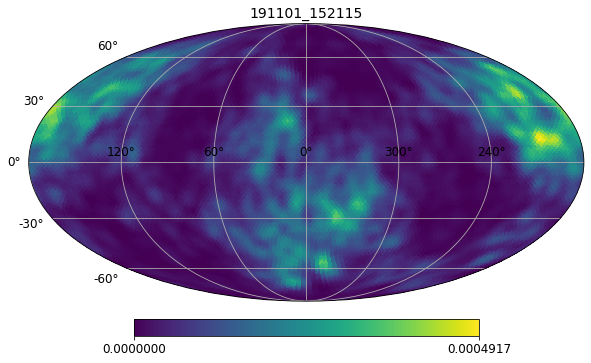

In [9]:
projview(f['191101_152115'][:],
         coord=["C"], graticule=True, graticule_labels=True,projection_type="mollweide",title='191101_152115')

So this is the skymap of 191101_152115.

In this work we just assume the intrinsic parameters of each GW canddiate are fixed to their PyCBC search results. To invoke such information, you need to download another file released in our 4-OGC github repository: https://github.com/gwastro/4-ogc

The search results link is: https://www.atlas.aei.uni-hannover.de/work/ahnitz/4ogc/4-ogc.hdf (Note: 419 MB)

After downloading the above file, let's take a look the search results

In [10]:
gwfile = h5py.File('/work/ahnitz/WWW/4ogc/4-ogc.hdf')

In [11]:
gwfile.keys()

<KeysViewHDF5 ['H1_chisq', 'H1_end_time', 'H1_sg_chisq', 'H1_snr', 'L1_chisq', 'L1_end_time', 'L1_sg_chisq', 'L1_snr', 'V1_chisq', 'V1_end_time', 'V1_sg_chisq', 'V1_snr', 'ifar', 'mass1', 'mass2', 'name', 'obs', 'pastro', 'spin1z', 'spin2z', 'stat', 'time', 'trig']>

Let's retrieve 191101_152115

In [12]:
i = np.where(gwfile['name'][:]=='191101_152115'.encode())[0]

In [13]:
i

array([4681729])

In [14]:
for k in gwfile.keys():
    print(k,':',gwfile[k][i[0]])

H1_chisq : -1.0
H1_end_time : -1.0
H1_sg_chisq : -1.0
H1_snr : -1.0
L1_chisq : 2.0631974426626463
L1_end_time : 1256656893.2382812
L1_sg_chisq : 1.0
L1_snr : 5.268786430358887
V1_chisq : 1.897824828387701
V1_end_time : 1256656893.256836
V1_sg_chisq : 1.0
V1_snr : 5.602438449859619
ifar : 5.940451533916982e-06
mass1 : 2.1319706682020003
mass2 : 2.4933663338387726
name : b'191101_152115'
obs : b'LV'
pastro : -1.0
spin1z : -0.23227775799326622
spin2z : 0.23119008395074436
stat : 1.3748672008514404
time : 1256656893.2475586
trig : b'LV'


So, it's a candidate detected by LIGO Livingston (L) and Virgo (V). Its best matched parameters are: mass1=2.13, mass2=2.49, etc.

# Let's plot all the associated GW and GRB pairs' sky maps

In [15]:
#GRB skymaps
grbsky = h5py.File('../grbdata/longgrb-skymap.hdf','r')

In [16]:
result = pd.read_csv('../search_results.csv')

In [17]:
tO1_start = Time('2015-09-12T00:00:00')
tO1_end = Time('2016-01-19T16:00:00')

tO2_start = Time('2016-11-30T16:00:00')
tO2_end = Time('2017-08-25T22:00:00')

tO3a_start = Time('2019-04-01T15:00:00')
tO3a_end = Time('2019-10-01T15:00:00')

tO3b_start = Time('2019-11-01T15:00:00')
tO3b_end = Time('2020-03-27T17:00:00')

/work/yifan.wang/virtualenv/ringdown/lib/python3.7/site-packages/healpy/newvisufunc.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plot_properties["figure_width"] * plot_properties["figure_size_ratio"],


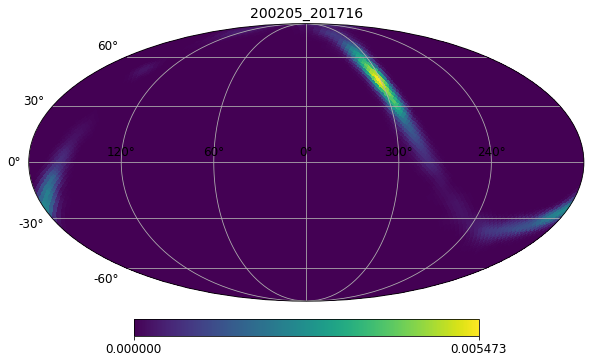

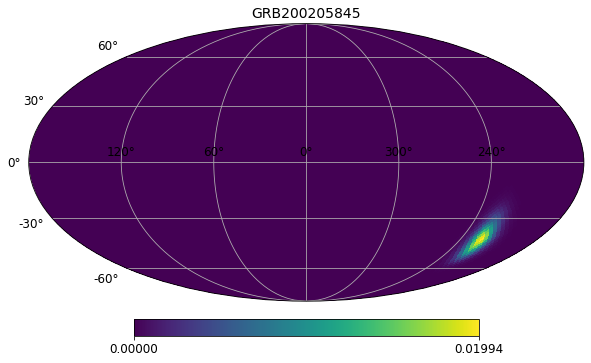

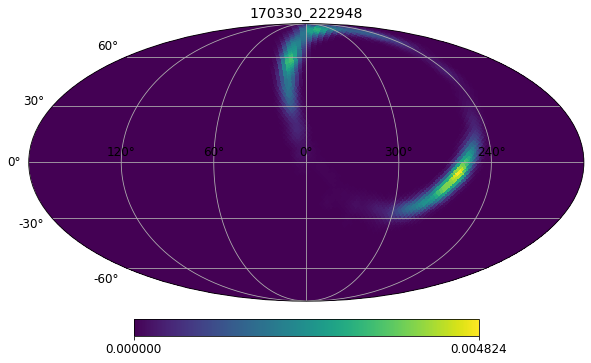

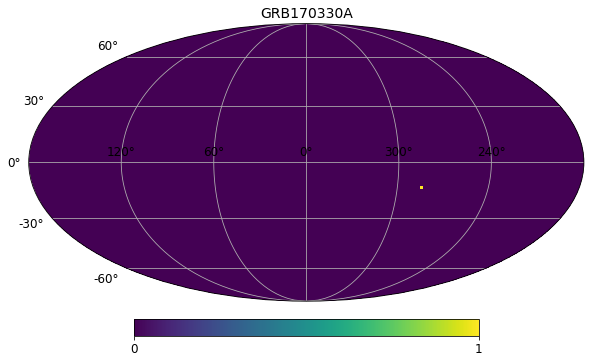

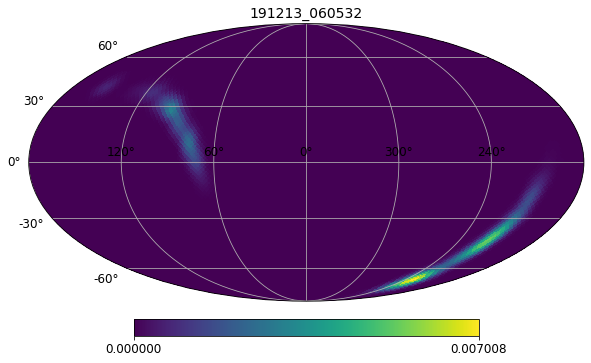

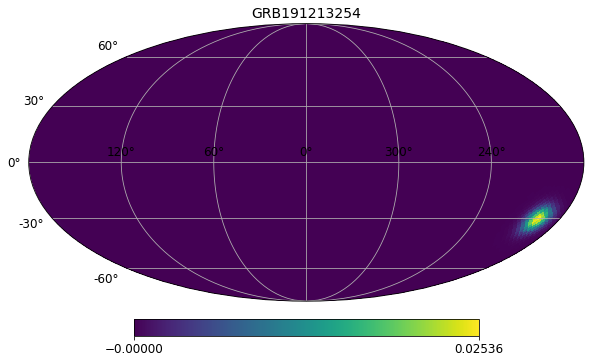

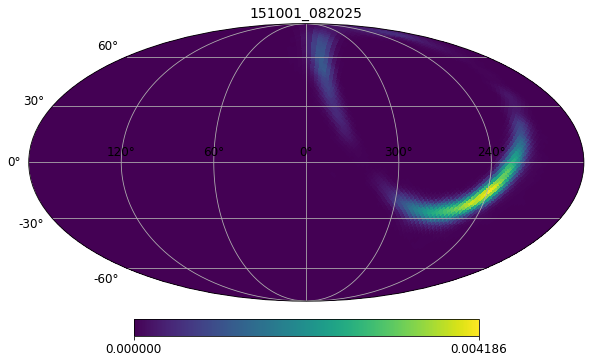

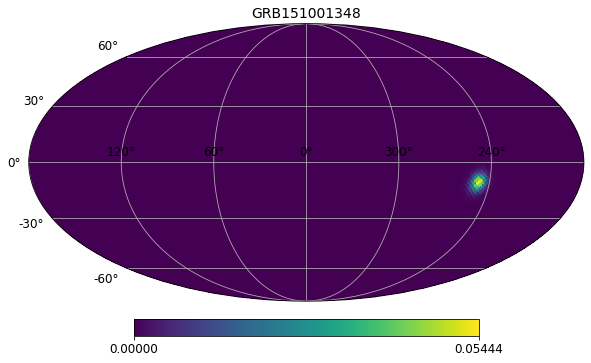

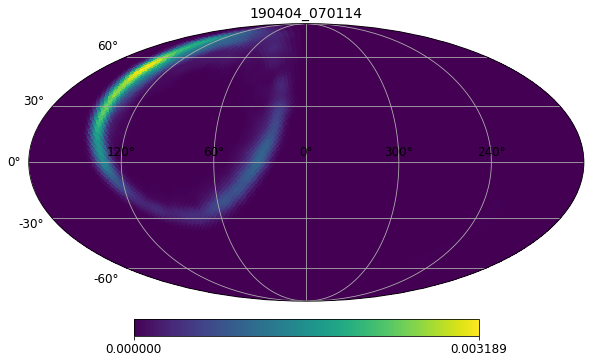

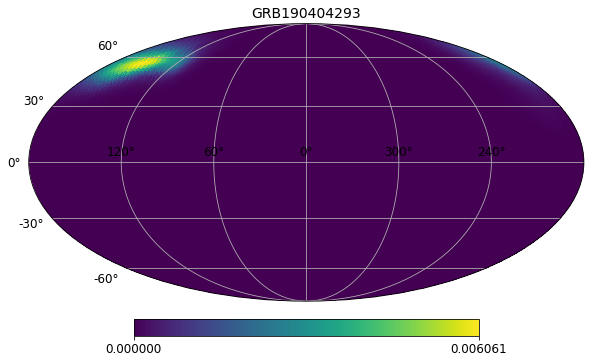

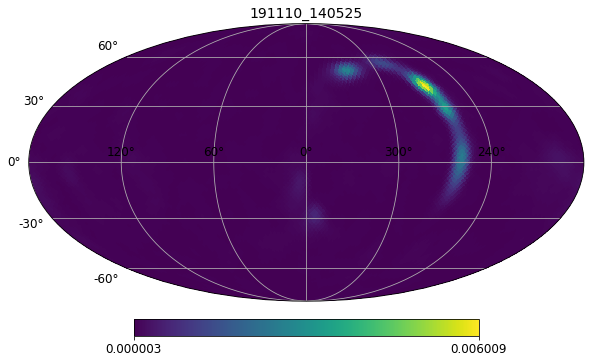

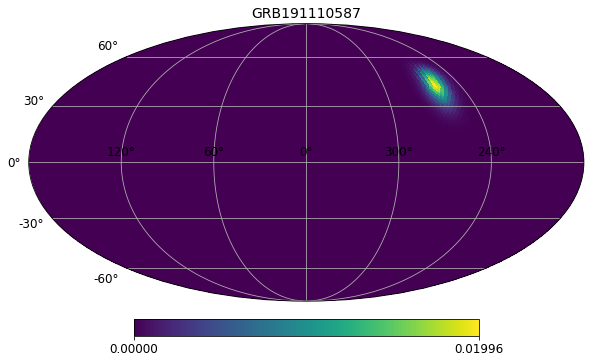

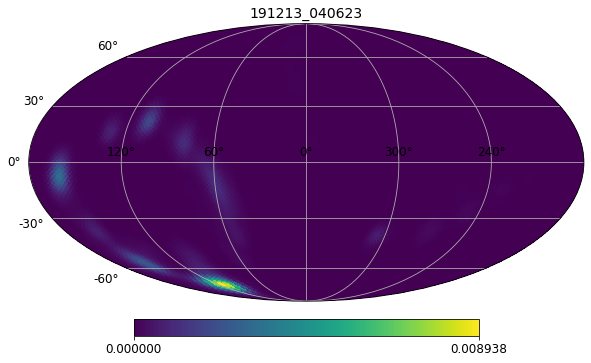

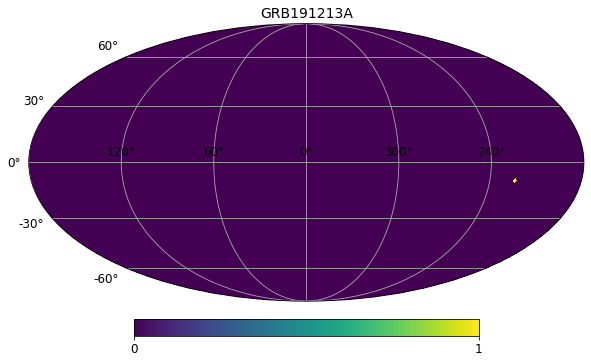

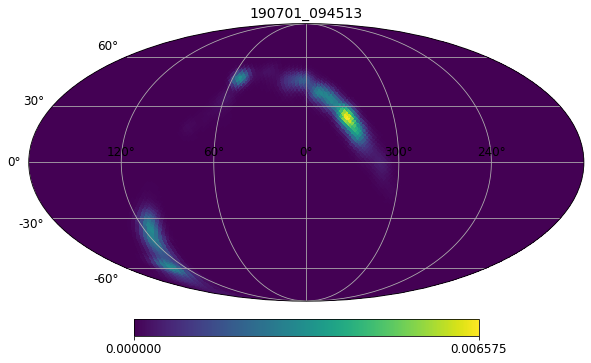

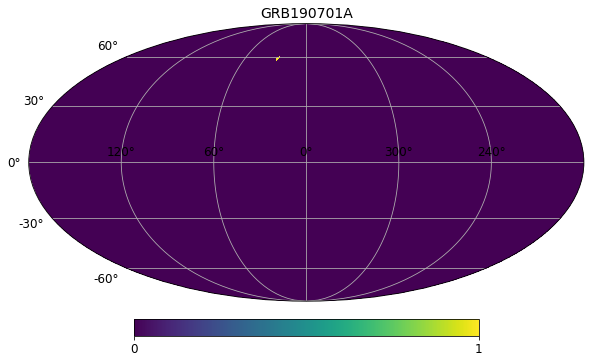

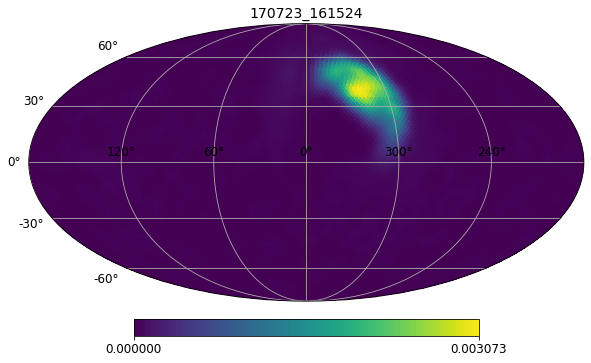

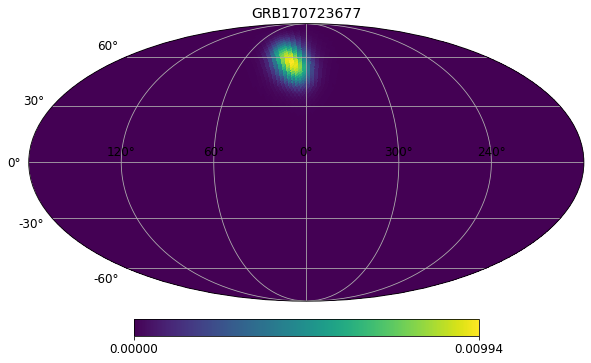

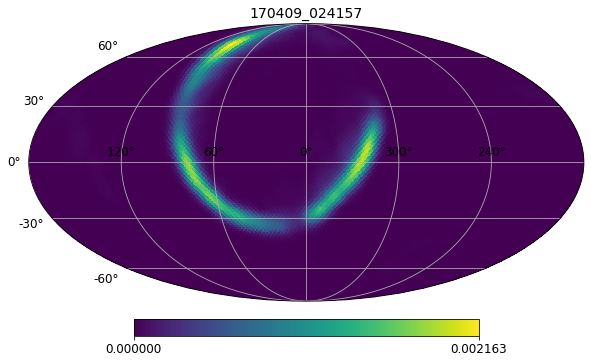

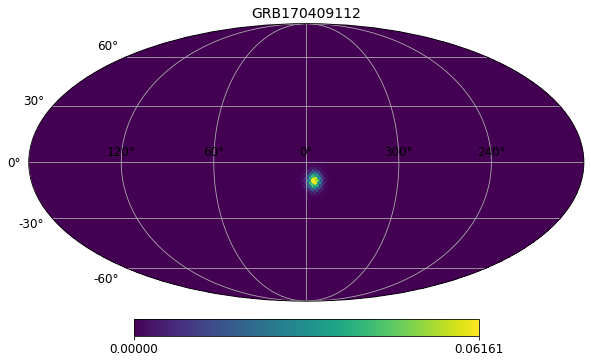

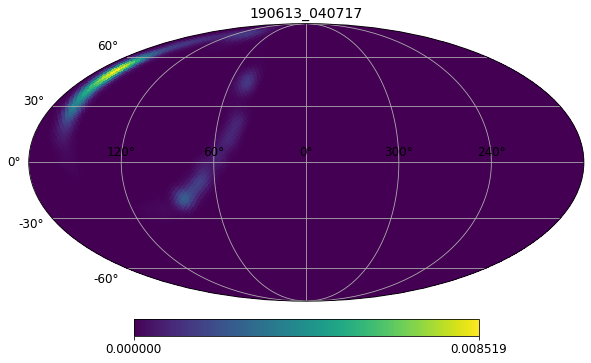

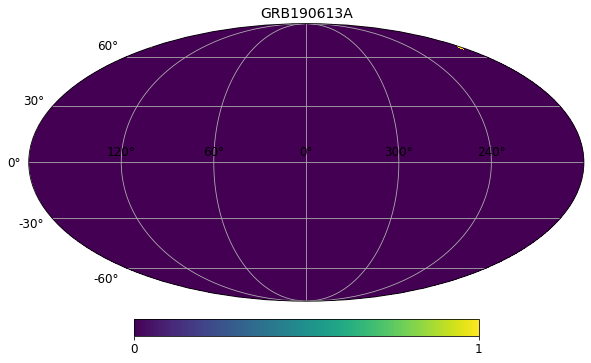

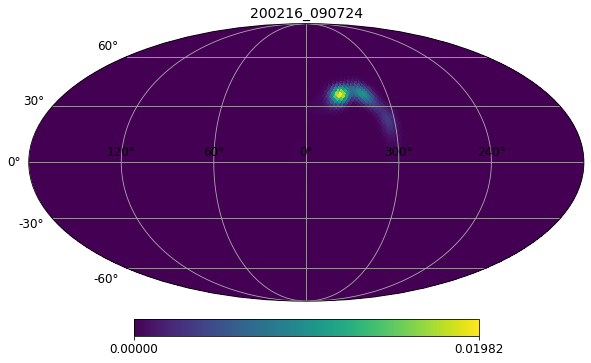

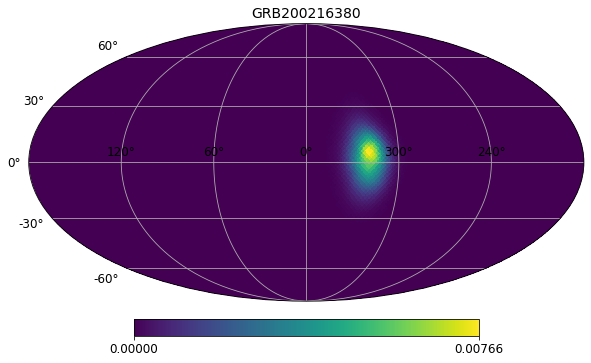

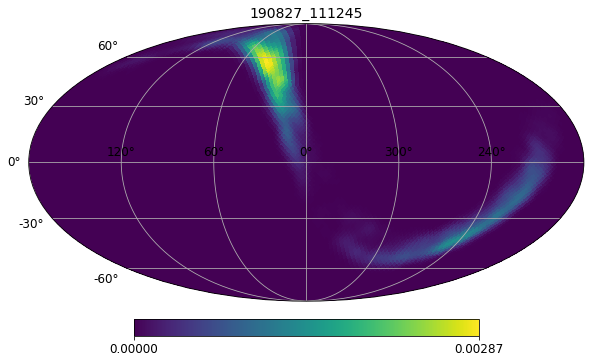

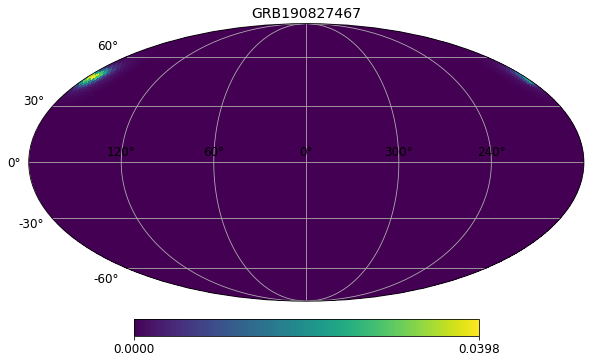

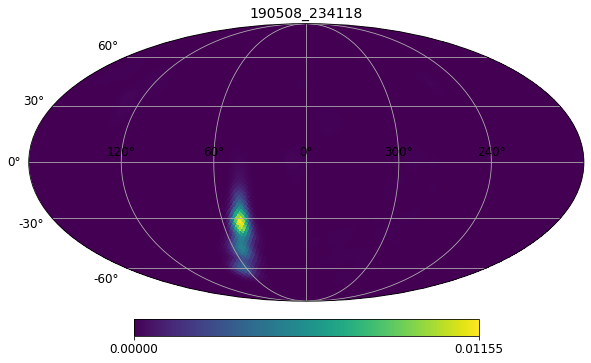

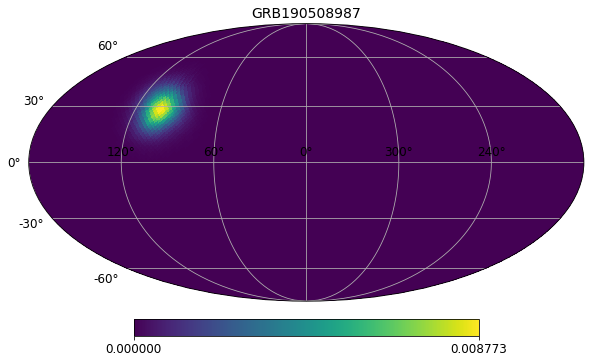

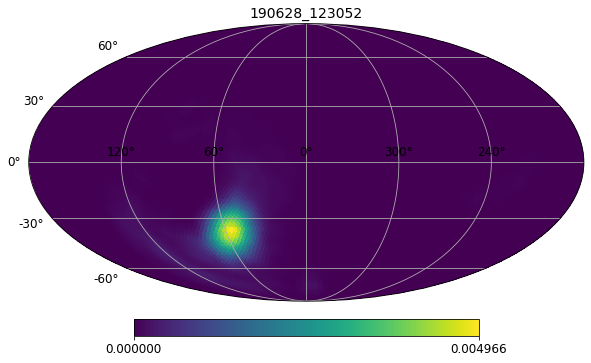

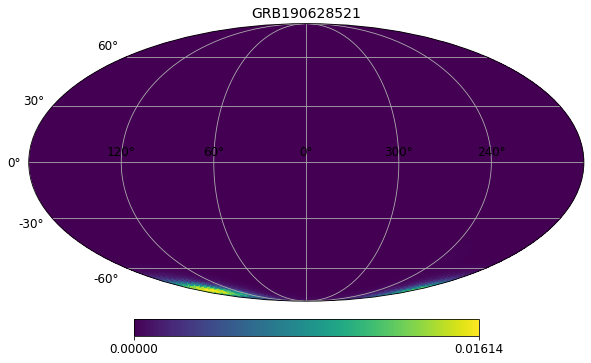

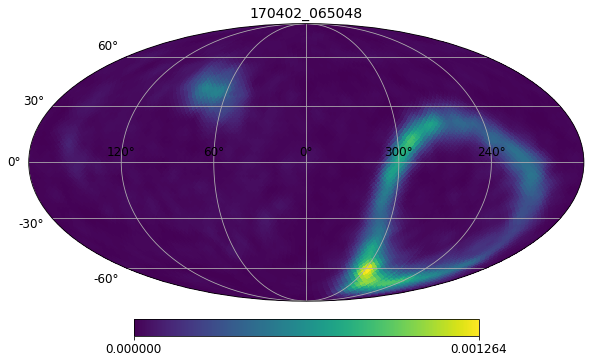

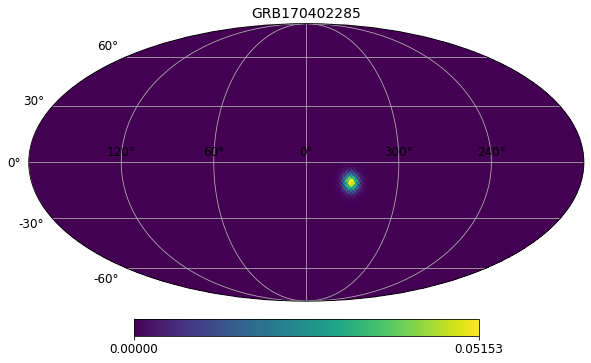

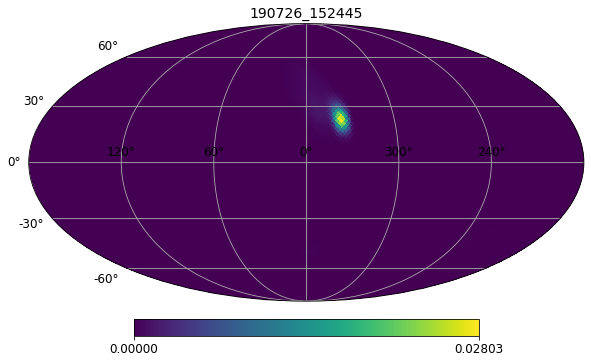

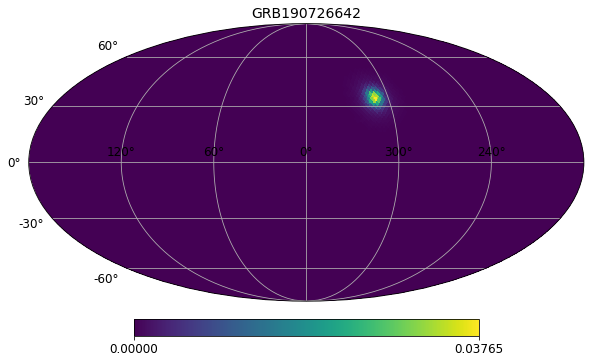

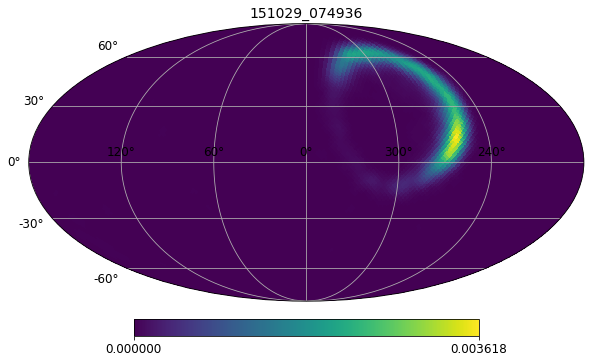

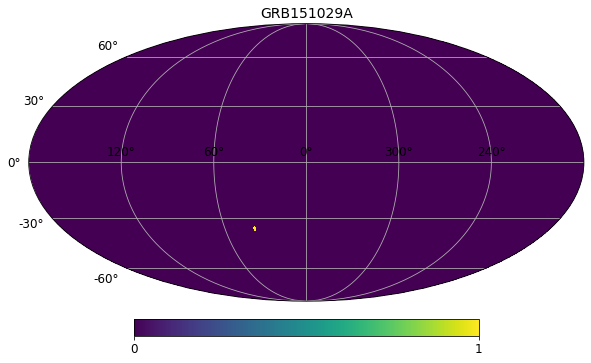

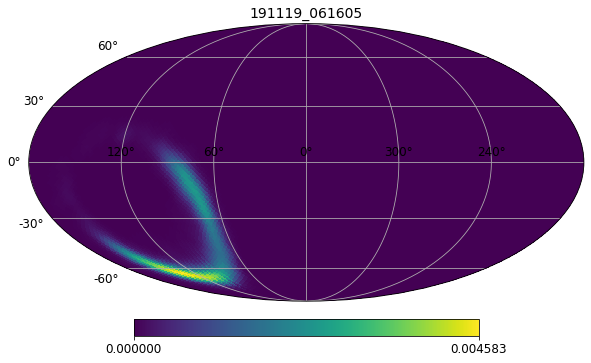

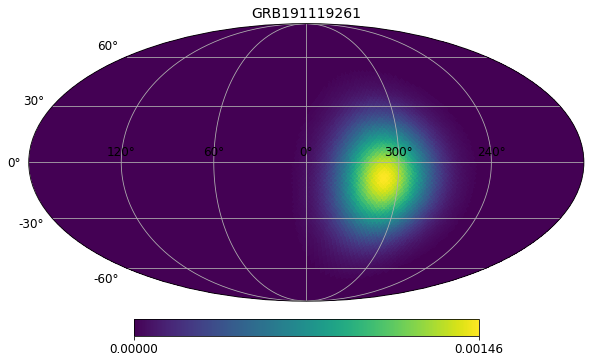

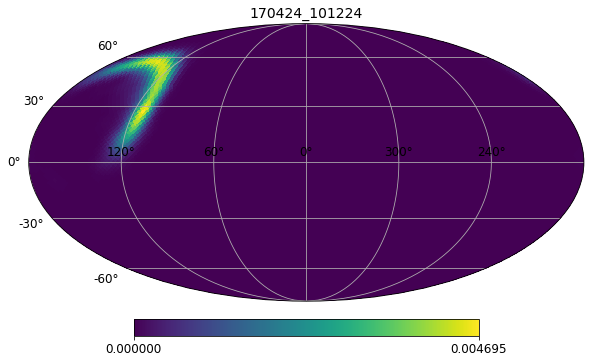

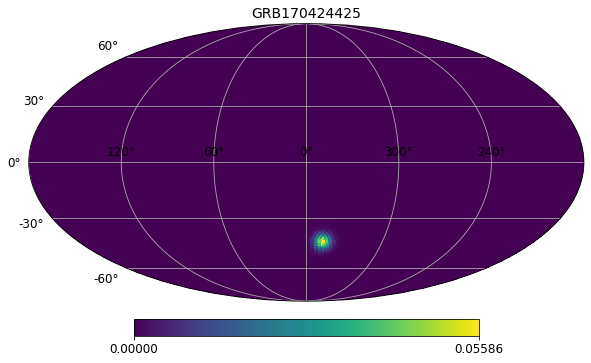

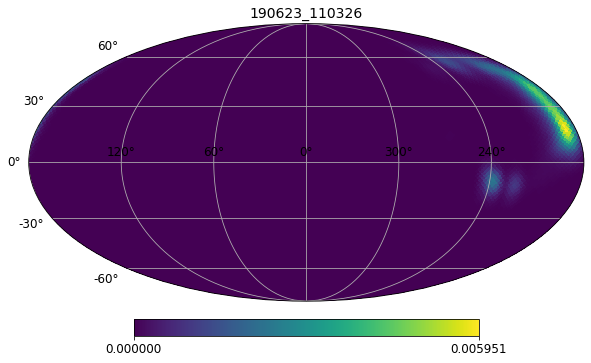

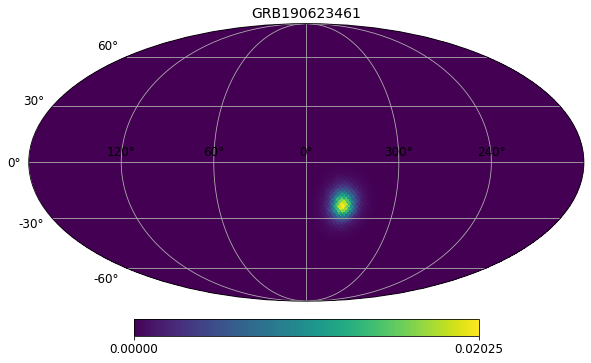

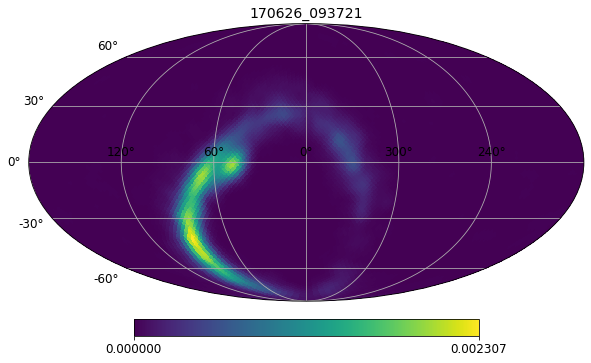

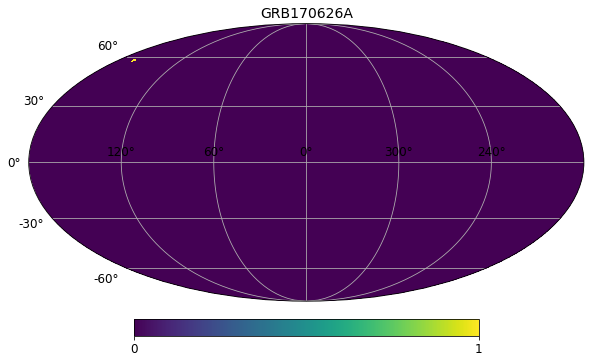

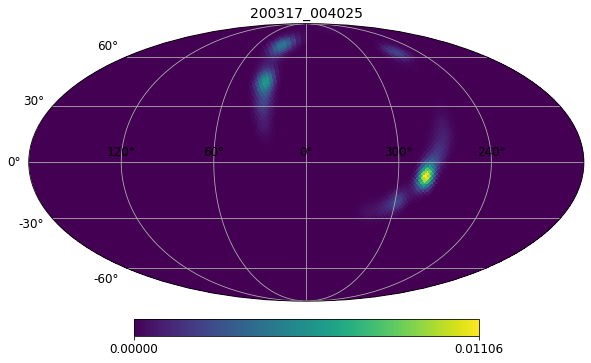

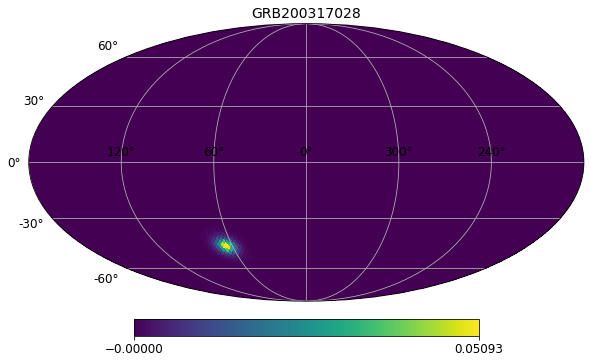

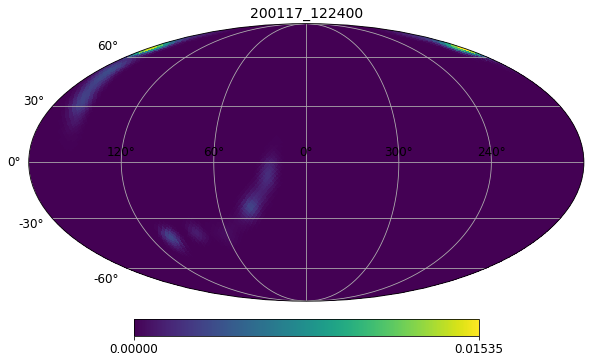

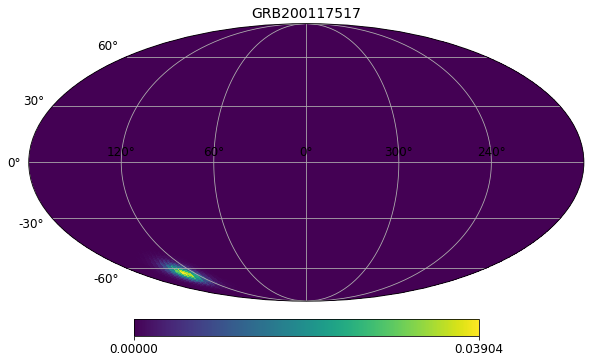

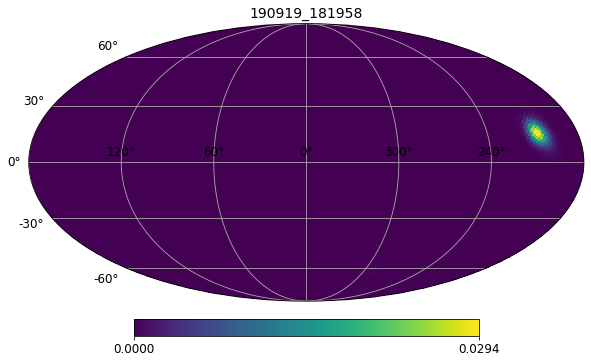

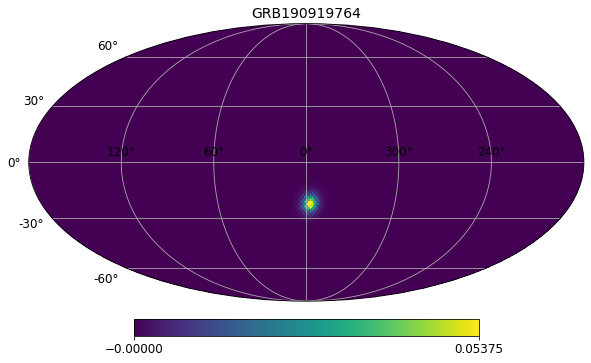

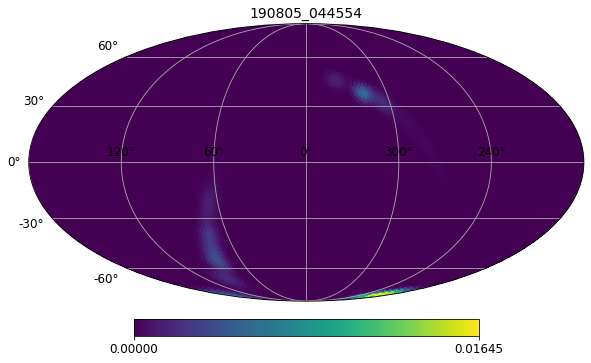

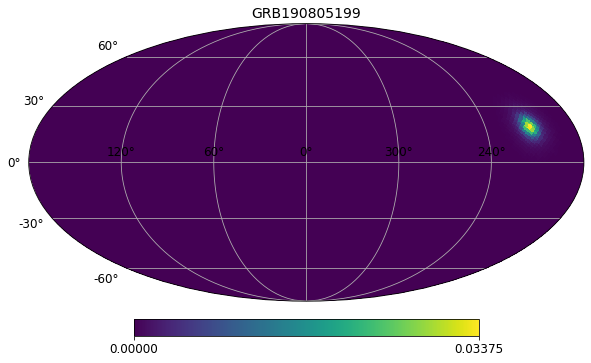

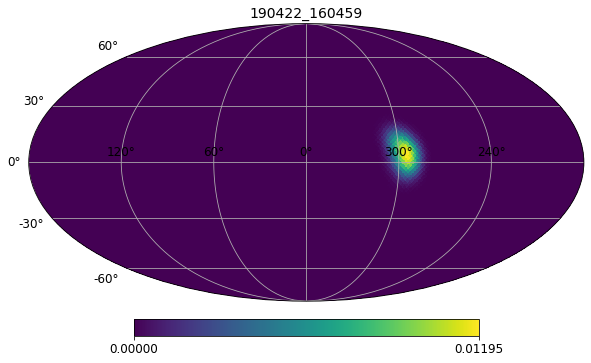

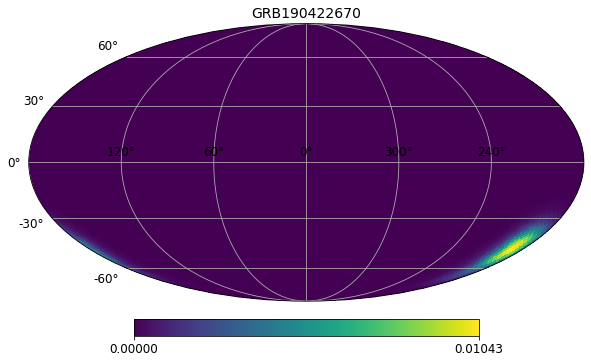

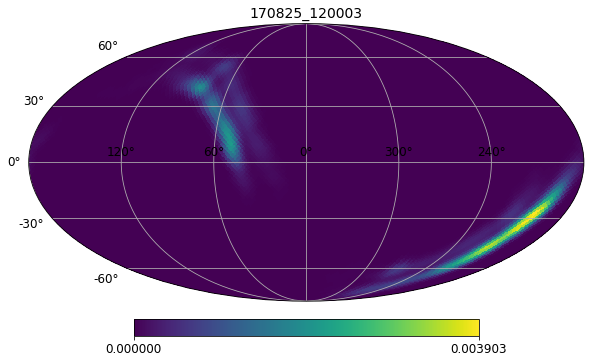

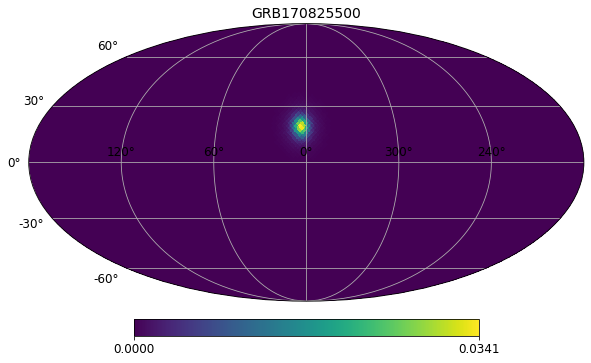

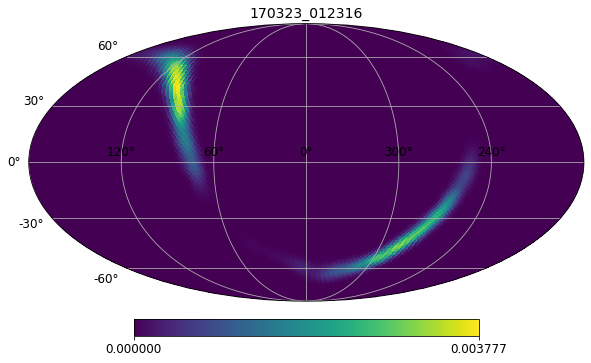

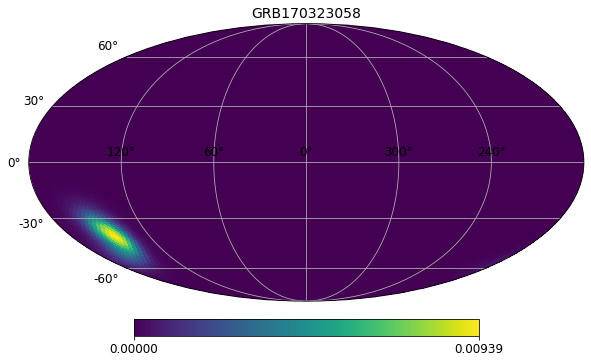

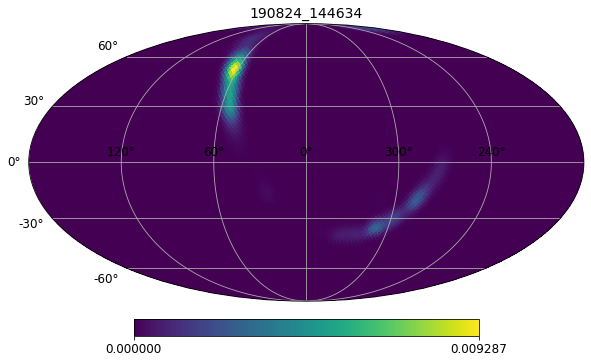

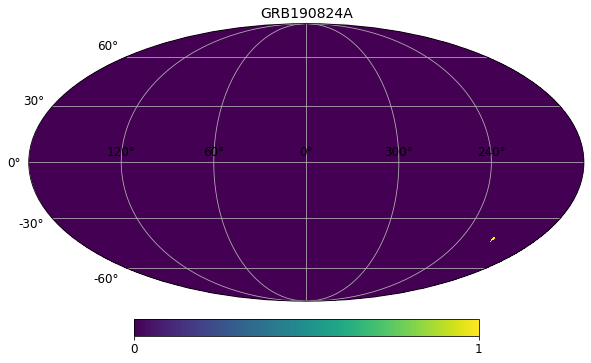

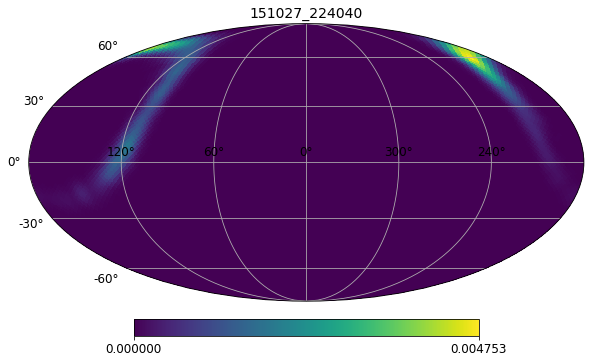

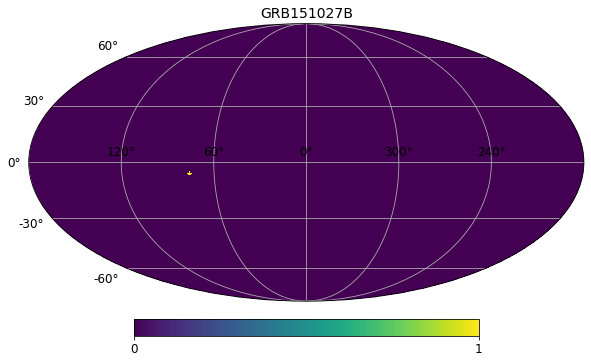

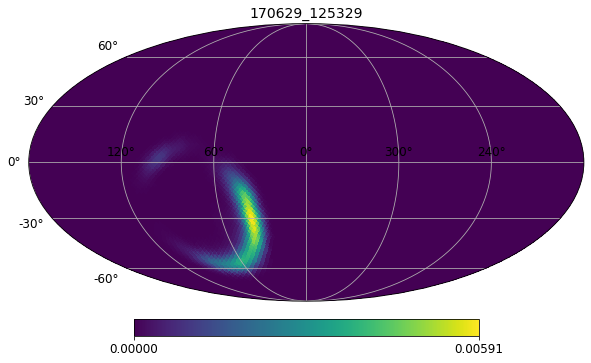

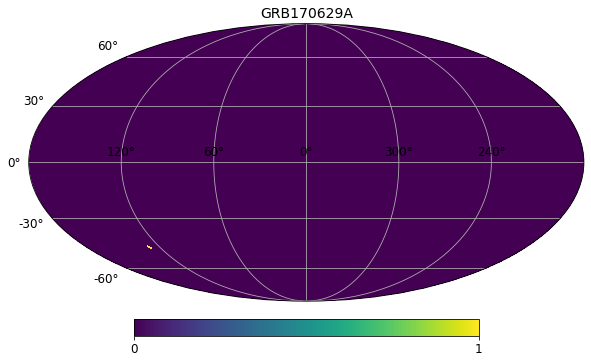

In [18]:
for i in range(len(result['gwname'])):
    gwname = result['gwname'].values[i]
    grbname = result['grbname'].values[i]
    
    t = result['gwtime'].values[i] 
    t = Time(t)
    
    if t>tO1_start and t<tO1_end:
        o = 'o1'
    elif t>tO2_start and t<tO2_end:
        o = 'o2'
    elif t>tO3a_start and t<tO3a_end:
        o = 'o3a'
    elif t>tO3b_start and t<tO3b_end:
        o = 'o3b'
    gw = h5py.File('/work/yifan.wang/grb/gwrun/gwskymap/gwskymap_'+str(o)+'.hdf','r')
    projview(gw[gwname][:],
         coord=["C"], graticule=True, graticule_labels=True,projection_type="mollweide",title=gwname)
    projview(grbsky[grbname][:],
         coord=["C"], graticule=True, graticule_labels=True,projection_type="mollweide",title=grbname)